## 데이터마다의 분석 아이디어를 기록해두겠습니다!

1. '../DATA/elec_data.csv' : 경북대학교 전력 사용량 데이터
2. '../DATA/gas_data.csv' : 경북대학교 가스 사용량 데이터
3. '../DATA/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20231130.csv' : 전국 태양광 및 풍력 발전량 데이터

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. elec_data.csv

In [17]:
# 1. Load the data
data_elec = pd.read_csv('../DATA/elec_data.csv')
data_elec.tail(10)

,useYm,useQty
138,202305,129896.0
139,202306,140844.0
140,202307,164994.0
141,202308,167263.0
142,202309,182880.0
143,202310,175957.0
144,202311,130124.0
145,202312,149871.0
146,202401,172577.0
147,202402,141258.0


In [18]:
data_elec.describe()

,useYm,useQty
count,148.000000,148.000000
mean,201715.797297,50533.770270
std,391.708068,69484.844902
min,201101.000000,1.000000
25%,201401.750000,422.250000
50%,201710.500000,4774.000000
75%,202101.250000,129953.000000
max,202402.000000,191391.000000


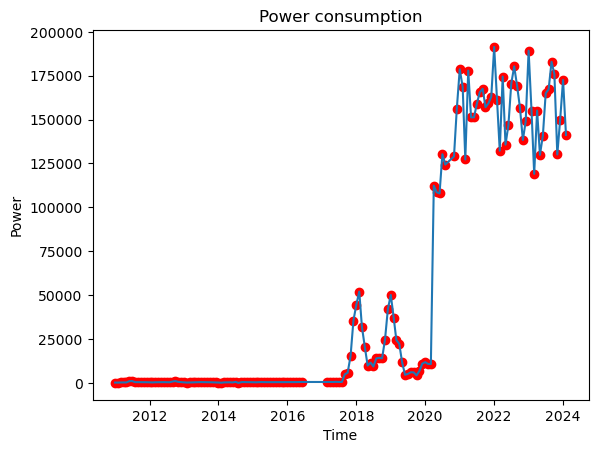

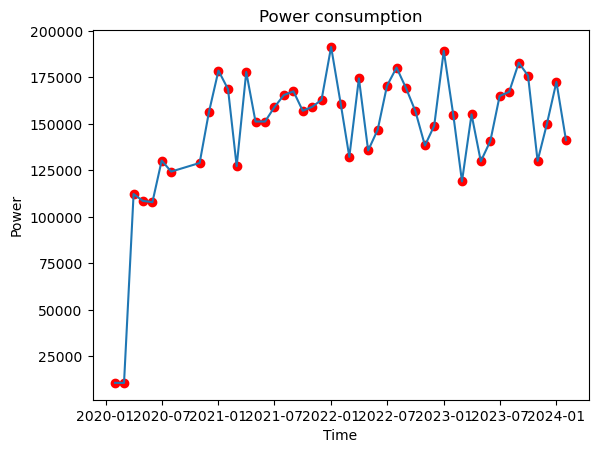

In [19]:
# useYm -> datetime format
data_elec['useYm'] = pd.to_datetime(data_elec['useYm'], format='%Y%m')

plt.plot(data_elec['useYm'], data_elec['useQty'])
plt.scatter(data_elec['useYm'], data_elec['useQty'], c='red')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power consumption')
plt.show()

# over 2020-01
data_elec = data_elec[data_elec['useYm'] > '2020-01']
plt.plot(data_elec['useYm'], data_elec['useQty'])
plt.scatter(data_elec['useYm'], data_elec['useQty'], c='red')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power consumption')
plt.show()

In [ ]:
# 월별 전력 사용량

### 간단 분석
- 2020년대부터 10만kWh 이상의 전력 사용량 : 여기서부터 유효하다 보면 좋을 듯!

### 분석 아이디어
- 계절성을 띠네요
- 경북대 전력 사용량 추세 : 증가? 일정?  
    -> 일정하다 : 예전 자료로 전기요금 예측  
    -> 증가한다 : 경북대의 전력 사용량이 증가하는 이유 분석, 미래 전력 사용량 예측

## 2. gas_data.csv

In [20]:
# load data
data_gas = pd.read_csv('../DATA/gas_data.csv')
data_gas['useYm'] = pd.to_datetime(data_gas['useYm'], format='%Y%m')
data_gas

,useYm,useQty
0,2011-01-01,9168269.0
1,2011-02-01,7072076.0
2,2011-03-01,5656101.0
3,2011-04-01,4096409.0
4,2011-05-01,1862692.0
...,...,...
150,2023-10-01,1214706.0
151,2023-11-01,1440307.0
152,2023-12-01,3956066.0
153,2024-01-01,3910183.0


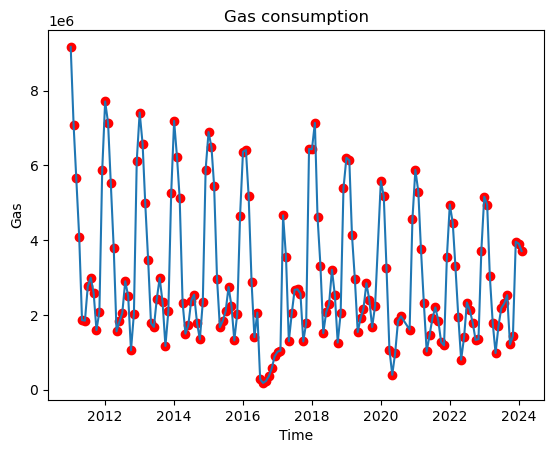

In [21]:
# plot data
plt.plot(data_gas['useYm'], data_gas['useQty'])
plt.scatter(data_gas['useYm'], data_gas['useQty'], c='red')
plt.xlabel('Time')
plt.ylabel('Gas')
plt.title('Gas consumption')
plt.show()

#### 분석 아이디어
- 가스 사용이 정확히 어딘진 모르겠지만, 난방으로 추정 (발전기는 없으니께)
- 제외해도 된다고 생각!

## 3. 한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20231130.csv

In [23]:
# 1. Load the data
data_elec = pd.read_csv('../DATA/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20231130.csv', encoding='cp949')
data_elec

,거래일자,거래시간,지역명,태양광발전량(Mwh),풍력발전량(Mwh)
0,2023-09-01,1,경기도,0.029757,0.0
1,2023-09-01,2,경기도,0.000000,0.0
2,2023-09-01,3,경기도,0.000000,0.0
3,2023-09-01,4,경기도,0.000000,0.0
4,2023-09-01,5,경기도,0.000000,0.0
...,...,...,...,...,...
37123,2023-11-30,20,부산시,3.121764,0.0
37124,2023-11-30,21,부산시,2.427456,0.0
37125,2023-11-30,22,부산시,0.612640,0.0
37126,2023-11-30,23,부산시,0.070920,0.0


In [24]:
# 지역명 == '대구시'
data_elec_daegu = data_elec[data_elec['지역명'] == '대구시']
data_elec_daegu

,거래일자,거래시간,지역명,태양광발전량(Mwh),풍력발전량(Mwh)
312,2023-09-01,1,대구시,0.000000,NaN
313,2023-09-01,2,대구시,0.000000,NaN
314,2023-09-01,3,대구시,0.000000,NaN
315,2023-09-01,4,대구시,0.000000,NaN
316,2023-09-01,5,대구시,0.000000,NaN
...,...,...,...,...,...
37051,2023-11-30,20,대구시,1.944088,NaN
37052,2023-11-30,21,대구시,0.967288,NaN
37053,2023-11-30,22,대구시,0.157388,NaN
37054,2023-11-30,23,대구시,0.000000,NaN


In [25]:
# NaN?
data_elec.describe()    # 원래 NaN이 많구나

,거래시간,태양광발전량(Mwh),풍력발전량(Mwh)
count,37128.00000,37128.000000,24024.000000
mean,12.50000,65.784046,34.365703
std,6.92228,166.805086,68.630351
min,1.00000,0.000000,0.000000
25%,6.75000,0.002160,0.000000
50%,12.50000,3.789978,1.939995
75%,18.25000,39.825684,31.250607
max,24.00000,1824.404856,405.596649


In [27]:
data_elec_daegu.fillna(0, inplace=True)
data_elec_daegu.describe()

C:\Users\wjs31\AppData\Local\Temp\ipykernel_24544\3048040535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_elec_daegu.fillna(0, inplace=True)


,거래시간,태양광발전량(Mwh),풍력발전량(Mwh)
count,2184.000000,2184.000000,2184.0
mean,12.500000,8.184702,0.0
std,6.923772,11.598424,0.0
min,1.000000,0.000000,0.0
25%,6.750000,0.000000,0.0
50%,12.500000,1.437090,0.0
75%,18.250000,14.109202,0.0
max,24.000000,40.891275,0.0


#### 분석 아이디어
-  대구 태양광 발전량 -> 경북대 태양광 공급량 가능량 추정 (연도별, 시간대별 발전량은 이렇고, 경북대엔 충분히 공급가능할 것이다!)

## 4. 공장 전력 사용량 - KT 빅데이터 플랫폼

## 5. 아파트 전력 사용량 - KT 빅데이터 플랫폼